<a href="https://colab.research.google.com/github/luqmanrofifm/Emotion-Classification-using-NLP/blob/main/Submission_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df_train = pd.read_csv("train.csv")

In [ ]:
df_train.head()

,Sentence,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
category = pd.get_dummies(df_train.Emotion)
df_baru = pd.concat([df_train, category], axis=1)
df_baru = df_baru.drop(columns='Emotion')
df_baru

,Sentence,anger,fear,joy,love,sadness,surprise
0,i didnt feel humiliated,0,0,0,0,1,0
1,i can go from feeling so hopeless to so damned...,0,0,0,0,1,0
2,im grabbing a minute to post i feel greedy wrong,1,0,0,0,0,0
3,i am ever feeling nostalgic about the fireplac...,0,0,0,1,0,0
4,i am feeling grouchy,1,0,0,0,0,0
...,...,...,...,...,...,...,...
17995,im having ssa examination tomorrow in the morn...,0,0,0,0,1,0
17996,i constantly worry about their fight against n...,0,0,1,0,0,0
17997,i feel its important to share this info for th...,0,0,1,0,0,0
17998,i truly feel that if you are passionate enough...,0,0,1,0,0,0


In [ ]:
sentence = df_baru['Sentence'].values
label = df_baru[['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']].values

In [ ]:
from sklearn.model_selection import train_test_split
sentence_train, sentence_test, label_train, label_test = train_test_split(sentence, label, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(sentence_train) 
tokenizer.fit_on_texts(sentence_test)
 
sekuens_train = tokenizer.texts_to_sequences(sentence_train)
sekuens_test = tokenizer.texts_to_sequences(sentence_test)
 
padded_train = pad_sequences(sekuens_train) 
padded_test = pad_sequences(sekuens_test)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=20000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
num_epochs = 30
history = model.fit(padded_train, label_train, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/30
450/450 - 13s - loss: 1.4437 - accuracy: 0.3492 - val_loss: 1.1953 - val_accuracy: 0.4225
Epoch 2/30
450/450 - 13s - loss: 1.1044 - accuracy: 0.4428 - val_loss: 1.1103 - val_accuracy: 0.4736
Epoch 3/30
450/450 - 13s - loss: 0.8564 - accuracy: 0.6365 - val_loss: 0.7756 - val_accuracy: 0.6953
Epoch 4/30
450/450 - 13s - loss: 0.5458 - accuracy: 0.7996 - val_loss: 0.5780 - val_accuracy: 0.8175
Epoch 5/30
450/450 - 13s - loss: 0.3598 - accuracy: 0.8813 - val_loss: 0.4595 - val_accuracy: 0.8611
Epoch 6/30
450/450 - 13s - loss: 0.2399 - accuracy: 0.9206 - val_loss: 0.4224 - val_accuracy: 0.8850
Epoch 7/30
450/450 - 13s - loss: 0.1831 - accuracy: 0.9415 - val_loss: 0.3838 - val_accuracy: 0.8925
Epoch 8/30
450/450 - 13s - loss: 0.1432 - accuracy: 0.9545 - val_loss: 0.3780 - val_accuracy: 0.8992
Epoch 9/30

Akurasi telah mencapai >90%!
450/450 - 13s - loss: 0.1226 - accuracy: 0.9588 - val_loss: 0.3892 - val_accuracy: 0.9042


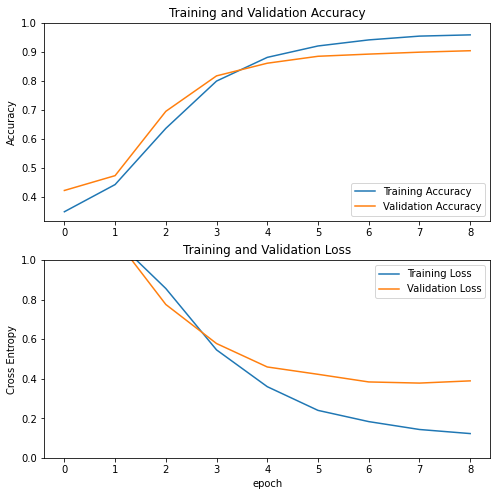

In [ ]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()